In [19]:
using Plots
using OptimalApplication

# The optimal college application strategy

## Exact algorithm for Alma's problem, implemented on binary heap

Alma's problem: $$\max\bigl\lbrace \operatorname{E}[\max\lbrace t_j Z_j: j \in \mathcal{X}\rbrace] : |\mathcal{X}| \leq h\bigr\rbrace$$

where $Z_j$ are independent Bernoulli with probabilities $f_j$. 

Solve an instance by enumeration and produce a series of plots showing the nestedness property.

In [23]:
function plotsmaker()
    m = length(t)
    
    pl = [plot(
            xlabel="f",
            ylabel="t",
            size=(700, 700)
            ) for i in 1:m+2]
    
    x = zeros(Bool, m, m)
    
    scatter!(pl[1], f, t, c=:darkslategray, ms=11, msw=0, msa=0, legend=nothing)
    
    for i in 1:m
        x[optimalportfolio_enumerate(f, t, i), i] .= true
        
        scatter!(pl[i+1], f[.!x[:, i]], t[.!x[:, i]], c=:darkslategray, ms=11, msw=0, msa=0, label=nothing)
        scatter!(pl[i+1], f[x[:, i]], t[x[:, i]], c=:orangered, ms=11, msw=0, msa=0, label="apply when h = $i")
    end
    
    apporder = sortperm(reshape(sum(x, dims=2), :), rev=true)
    
    scatter!(pl[end], f, t, c=:forestgreen, ms=13, msw=0, msa=0, legend=nothing)
    annotate!(pl[end], [(f[i], t[i], text("$(apporder[i])", 9, :white)) for i in 1:m])
    
    return pl, x, apporder
end

plotsmaker (generic function with 1 method)

In [24]:
m = 20

φ = 0.7
t = rand(m) |> sort
f = 1 .- (φ*t + (1-φ)*rand(m))

@time pl, x, apporder = plotsmaker()
v_enum = [valuation(apporder[1:h], f, t) for h in 1:m]

# for c in eachcol(x)
#     println(c)
# end

# for p in pl
#     display(p)
# end

[apporder v_enum applicationorder(f, t; datastructure=:dict)...]

  2.697654 seconds (14.03 M allocations: 1.322 GiB, 8.15% gc time, 4.63% compilation time)


20×4 Matrix{Float64}:
 12.0  0.327799  12.0  0.327799
 14.0  0.474039  14.0  0.474039
 10.0  0.552833  10.0  0.552833
 16.0  0.605025  16.0  0.605025
 17.0  0.643016  17.0  0.643016
 19.0  0.674707  19.0  0.674707
 13.0  0.699075  13.0  0.699075
 20.0  0.721246  20.0  0.721246
 18.0  0.739697  18.0  0.739697
 15.0  0.755861  15.0  0.755861
  6.0  0.765985   6.0  0.765985
  9.0  0.770883   9.0  0.770883
 11.0  0.773552  11.0  0.773552
  8.0  0.774823   8.0  0.774823
  7.0  0.775374   7.0  0.775374
  5.0  0.775553   5.0  0.775553
  4.0  0.775581   4.0  0.775581
  3.0  0.775588   3.0  0.775588
  2.0  0.775589   2.0  0.775589
  1.0  0.775589   1.0  0.775589

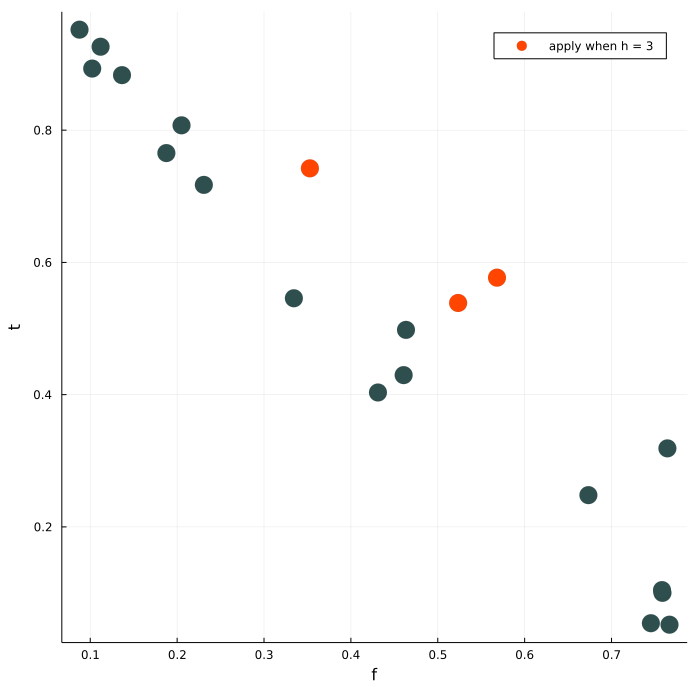

In [25]:
# for (n, i) in enumerate(pl)
#       display(i)
# end
display(pl[4])

In [47]:
# for (n, i) in enumerate(pl)
#     savefig(i, "optportfolio-$(n-1).png")
#     savefig(i, "optportfolio-$(n-1).pdf")
# end

In [3]:
# Helper for making my seminar slides
# for i in 0:length(pl)-1
#     print("\\begin{frame}\\begin{center}\\includegraphics[height=\\textheight]{./plots/optportfolio-$i.pdf}\\end{center}\\end{frame}\n")
# end

### Comparative statics example

In [21]:
t = Float64.(collect(range(start=200, step=50, length=8)))
f = [0.39, 0.33, 0.24, 0.24, 0.05, 0.03, 0.1, 0.12]

8-element Vector{Float64}:
 0.39
 0.33
 0.24
 0.24
 0.05
 0.03
 0.1
 0.12

In [22]:
apporder, v = applicationorder(f, t)
# v = [valuation(apporder[1:i], f, t) for i in 1:8]

[t f apporder round.(v)[apporder]]

8×4 Matrix{Float64}:
 200.0  0.39  4.0  230.0
 250.0  0.33  2.0  147.0
 300.0  0.24  8.0  294.0
 350.0  0.24  1.0   84.0
 400.0  0.05  7.0  289.0
 450.0  0.03  3.0  195.0
 500.0  0.1   5.0  258.0
 550.0  0.12  6.0  282.0

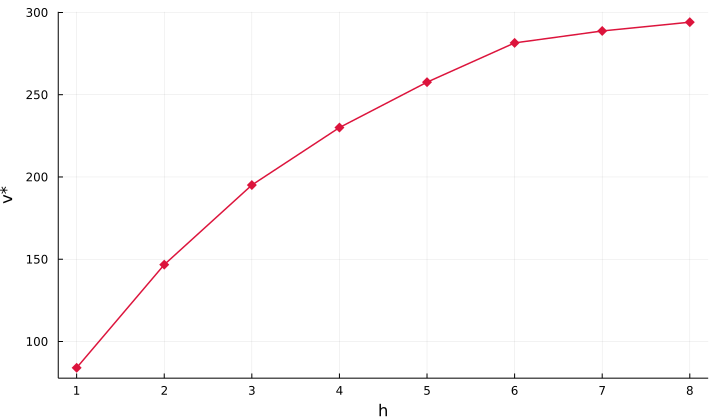

In [23]:
pl = plot(v, legend=false, size=(720, 420), xlabel="h", ylabel="v*", lw=1.5, color=:crimson, xticks=1:8, marker=:diamond, msw=0, msa=0, ms=5)

In [41]:
# savefig(pl, "h-utility.png")
# savefig(pl, "h-utility.pdf")

In [ ]:
Slightly nicer formatting of print above:

 200  0.39  4  230
 250  0.33  2  147
 300  0.24  6  282
 350  0.24  1   84
 400  0.05  7  289
 450  0.03  8  294
 500  0.1   5  258
 550  0.12  3  195

### Tight example

Tight example for bound $v(\mathcal{Y}) \geq v(\mathcal{X}) /h$, where $\mathcal{Y}$ is the naive solution that picks the $h$ schools with highest $f_j t_j$-value.

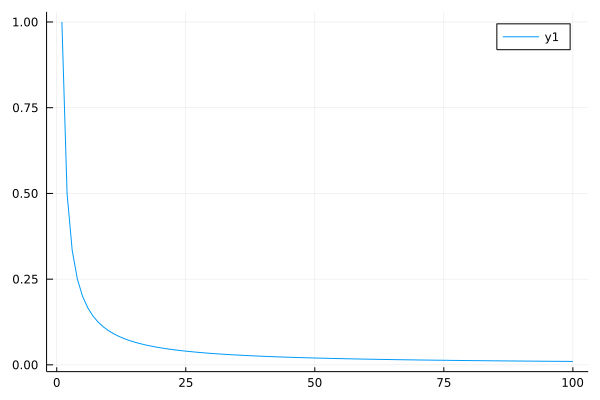

In [9]:
h = 100
m = 2 * h

f = vcat(ones(h), 2.0 .^ range(-1, step=-1, length=m))
t = 1 ./ f # (1 .+ range(0.000001, 0, length=m)) ./ f
ft = f .* t

X, V = applicationorder(f, t, h)
[valuation(collect(1:j), f, t)/V[j] for j in 1:h] |> plot

## Quasipolynomial-time algorithm for generalization with variable application costs

Ellis's problem: Now $g_j$ is the cost of applying to college $c_j$; $H$ is the total application budget. The problem is
$$\max\Bigl\lbrace \operatorname{E}[\max\lbrace t_j Z_j: j \in \mathcal{X}\rbrace] : \sum_{j \in \mathcal{X}} g_j \leq H\Bigr\rbrace$$

Let $V[j, h]$ denote the optimal portfolio costing no more than $h$ using only the first $j$ schools. 

Base cases:
$$
\begin{align*}
V[j, 0] &= 0, \quad & j = 0\dots m \\
V[0, h] &= -\infty, \quad & h < 0 \\
\end{align*}
$$

Bellman equation:
$$
\begin{align*}
V[j, h] &= \max\bigl( V[j-1, h],~(1 - f_j) V[j-1, h-g_j] + f_j t_j \bigr), \quad & j = 1\dots m, h = 1\dots H
\end{align*}
$$

Solve an instance with all $g_j = 1$ and make sure it agrees with solution from above.

In [123]:
m = 10

φ = 0.7
t = rand(m) |> sort
f = 1 .- (φ*t + (1-φ)*rand(m))
g = ones(Int64, m)
h = m ÷ 2

X, V = valuationtable(f, t, g, h)
sort!(X)
X_, v_ = optimalportfolio_variablecosts(f, t, g, h)
sort!(X_)
X__, V__ = applicationorder(f, t, h)
sort!(X__)
display([X X_ X__])
V[end, end], v_, V__[h]

LoadError: MethodError: optimalportfolio_variablecosts(::Vector{Float64}, ::Vector{Float64}, ::Vector{Int64}, ::Int64) is ambiguous. Candidates:
  optimalportfolio_variablecosts(f::Vector{Float64}, t::Vector{<:Real}, g::Vector{Int64}, H::Int64) in Main at In[122]:55
  optimalportfolio_variablecosts(f::Vector{Float64}, t::Vector{Float64}, g::Vector{Int64}, H) in Main at In[120]:55
Possible fix, define
  optimalportfolio_variablecosts(::Vector{Float64}, ::Vector{Float64}, ::Vector{Int64}, ::Int64)

Make sure the table form and recursive form agree with each other.

In [8]:
m = 10

φ = 0.7
t = rand(m) |> sort
f = 1 .- (φ*t + (1-φ)*rand(m))
g = rand(1:5, m)
H = sum(g) ÷ 3

@show g
@show H

X, V = valuationtable(f, t, g, H)
display(V)
sort!(X)

X_, v_ = optimalportfolio_variablecosts(f, t, g, H, true)
sort!(X_)
display([X g[X] X_ g[X_]])

@show V[end, end], v_

10×10 Matrix{Float64}:
 0.0  0.0       0.00701334  0.00701334  …  0.00701334  0.00701334  0.00701334
 0.0  0.0       0.136857    0.136857       0.139031    0.139031    0.139031
 0.0  0.0       0.156895    0.156895       0.196224    0.196848    0.196848
 0.0  0.225452  0.225452    0.225452       0.306778    0.306778    0.306778
 0.0  0.225452  0.251081    0.251081       0.362327    0.362327    0.362327
 0.0  0.225452  0.251081    0.251081    …  0.422997    0.422997    0.467525
 0.0  0.225452  0.251081    0.251081       0.422997    0.459811    0.467525
 0.0  0.225452  0.251081    0.251081       0.422997    0.468152    0.500515
 0.0  0.225452  0.251081    0.289946       0.434787    0.468152    0.500515
 0.0  0.225452  0.251081    0.289946       0.460262    0.497983    0.519095

3×4 Matrix{Int64}:
  4  2   4  2
  6  5   6  5
 10  3  10  3

g = [3, 3, 3, 2, 3, 5, 4, 4, 2, 3]
H = 10
(V[end, end], v_) = (0.5190946973996011, 0.5190946973996011)


(0.5190946973996011, 0.5190946973996011)

## FPTAS for Ellis's problem

In [116]:
m = 20

φ = 0.7
t = rand(m) |> sort
f = 1 .- (φ*t + (1-φ)*rand(m))
t = round.(Int, 100 * t)
g = rand(1:10, m)
H = sum(g) ÷ 3

@show t
@show round.(f, digits=3)
@show g
@show H

W = optimalportfolio_fptas(f, t, g, H, 0.5) |> sort
X = optimalportfolio_enumerate(f, t, g, H) |> sort

@show W
@show X

valuation(W, f, t) / valuation(X, f, t)

t = [23, 26, 29, 36, 36, 41, 43, 45, 47, 53, 55, 56, 60, 70, 79, 82, 93, 93, 95, 99]
round.(f, digits = 3) = [0.706, 0.68, 0.63, 0.657, 0.722, 0.438, 0.409, 0.462, 0.445, 0.51, 0.384, 0.405, 0.361, 0.228, 0.339, 0.205, 0.338, 0.194, 0.182, 0.226]
g = [1, 3, 3, 4, 3, 5, 5, 2, 1, 3, 1, 5, 4, 1, 5, 1, 3, 4, 4, 4]
H = 20
v = 81.0Q62f1
W = [9, 11, 14, 15, 16, 17, 19, 20]
X = [1, 9, 11, 14, 16, 17, 18, 19, 20]


0.9944071025429936

In [137]:
m = 1000

φ = 0.7
t = rand(m) |> sort
f = 1 .- (φ*t + (1-φ)*rand(m))
t = round.(Int, 100 * t)
g = rand(1:5, m)
H = sum(g) ÷ 3

@time W = optimalportfolio_fptas(f, t, g, H, 0.1) |> sort
@time X, v = optimalportfolio_variablecosts(f, t, g, H)

@show W
@show X

valuation(W, f, t) / v

v = 99.6309Q53f10
 63.492875 seconds (483.09 M allocations: 15.364 GiB, 4.54% gc time)
  0.595041 seconds (12.30 M allocations: 359.509 MiB, 7.41% gc time)
W = [701, 715, 759, 831, 869, 876, 886, 911, 917, 919, 920, 923, 932, 939, 944, 947, 949, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000]
X = [1000, 999, 998, 997, 996, 995, 994, 993, 992, 991, 990, 989, 988, 987, 986, 985, 984, 983, 982, 981, 980, 979, 978, 977, 976, 975, 974, 973, 972, 971, 970, 969, 968, 967, 966, 965, 964, 963, 962, 961, 960, 959, 958, 957, 956, 955, 954, 953, 952, 951, 950, 949, 948, 947, 946, 945, 944, 943, 942, 941, 940, 939, 938, 937, 936, 935, 934, 933, 932, 931, 930, 929, 928, 927, 926, 925, 924, 923, 922, 921, 920, 919, 918, 917, 916, 915, 914, 913, 912, 911, 910, 909, 908, 907, 906, 905, 904, 903, 902, 901, 900, 899, 89

0.9999991142604912

In [138]:
valuation(X, f, t)  - v

2.842170943040401e-14